In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/Users/alfia/Desktop/Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
df.columns=['CustomerID', 'Gender', 'Age', 'Annual_Income',
       'SpendingScore']

In [11]:
df.head(2)

,CustomerID,Gender,Age,Annual_Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81


<AxesSubplot:xlabel='Age', ylabel='Density'>

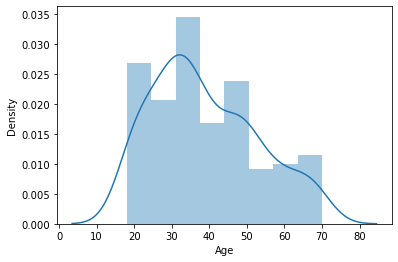

In [12]:
sns.distplot(df.Age)

<AxesSubplot:xlabel='Annual_Income', ylabel='Density'>

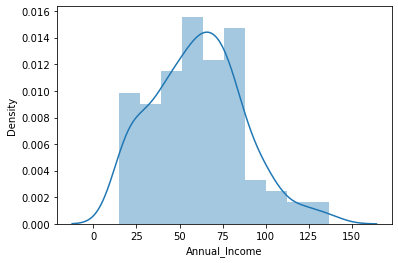

In [13]:
sns.distplot(df.Annual_Income)

<AxesSubplot:xlabel='SpendingScore', ylabel='Density'>

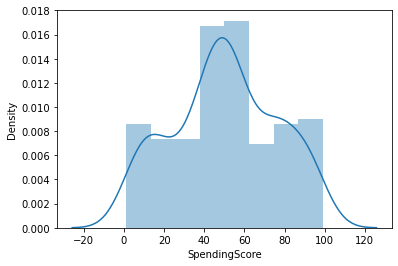

In [14]:
sns.distplot(df.SpendingScore)

<AxesSubplot:>

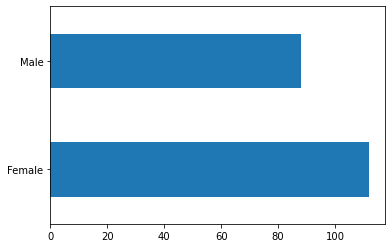

In [15]:
df.Gender.value_counts().plot(kind='barh')

In [16]:
df.head(2)

,CustomerID,Gender,Age,Annual_Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81


<AxesSubplot:xlabel='Gender', ylabel='Annual_Income'>

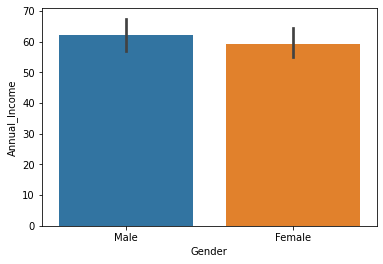

In [17]:
sns.barplot(x='Gender',y='Annual_Income',data=df)

<AxesSubplot:xlabel='Gender', ylabel='SpendingScore'>

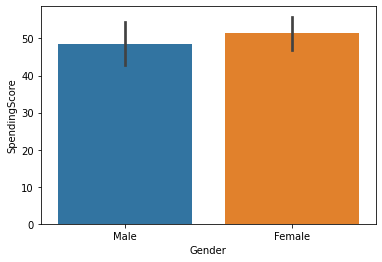

In [18]:
sns.barplot(x='Gender',y='SpendingScore',data=df)

<AxesSubplot:xlabel='Gender', ylabel='Annual_Income'>

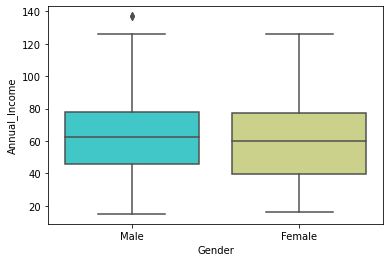

In [19]:
sns.boxplot(x='Gender',y='Annual_Income',data=df,palette='rainbow')

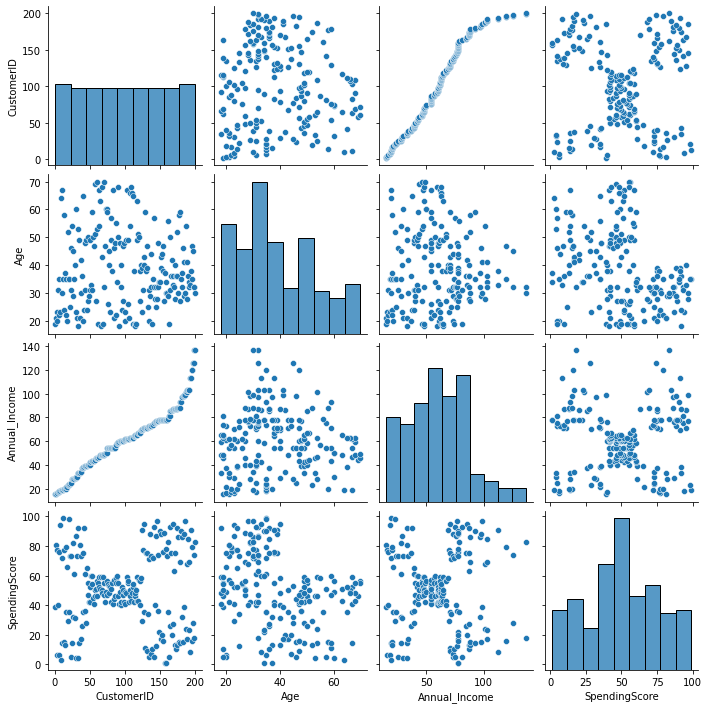

In [20]:
sns.pairplot(df)

<AxesSubplot:>

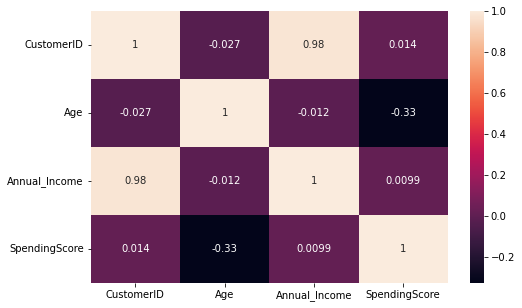

In [21]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)

In [22]:
df.isnull().sum()

CustomerID       0
Gender           0
Age              0
Annual_Income    0
SpendingScore    0
dtype: int64

<AxesSubplot:xlabel='Age'>

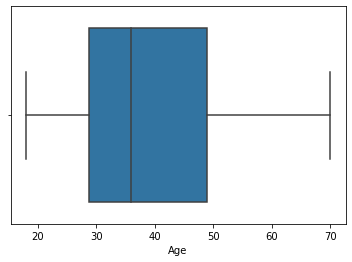

In [23]:
sns.boxplot(df.Age)

<AxesSubplot:xlabel='Annual_Income'>

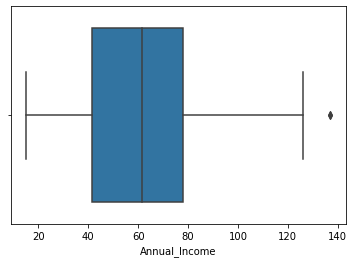

In [24]:
sns.boxplot(df.Annual_Income)

In [25]:
def outlier_credit_score(df):
    IQR = df['Annual_Income'].quantile(0.75) - df['Annual_Income'].quantile(0.25)
    
    lower_range = df['Annual_Income'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['Annual_Income'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['Annual_Income'] <= lower_range, 'Annual_Income'] = lower_range
    df.loc[df['Annual_Income'] >= upper_range, 'Annual_Income'] = upper_range
    
outlier_credit_score(df)

<AxesSubplot:xlabel='Annual_Income'>

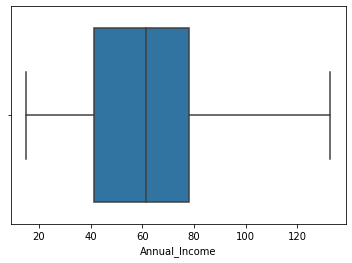

In [26]:
sns.boxplot(df.Annual_Income)

<AxesSubplot:xlabel='SpendingScore'>

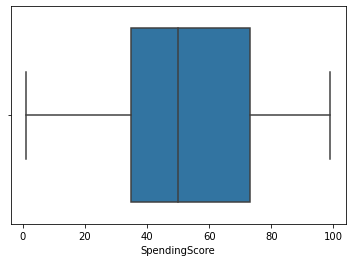

In [27]:
sns.boxplot(df.SpendingScore)

In [28]:
df.head(2)

,CustomerID,Gender,Age,Annual_Income,SpendingScore
0,1,Male,19,15.0,39
1,2,Male,21,15.0,81


In [29]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
df['Sex']=le_sex.fit_transform(df.Gender)

In [30]:
df.drop(['Gender','CustomerID'],axis=1,inplace=True)

In [31]:
df.head(2)

,Age,Annual_Income,SpendingScore,Sex
0,19,15.0,39,1
1,21,15.0,81,1


In [32]:
df2 = df[['Sex','Age','Annual_Income']]

In [33]:
df2.head(2)

,Sex,Age,Annual_Income
0,1,19,15.0
1,1,21,15.0


In [34]:
x = df[['Annual_Income','SpendingScore']]

In [35]:
from sklearn.cluster import DBSCAN

In [36]:
dbscan = DBSCAN(eps=1, min_samples=3)
dbscan.fit(x)

DBSCAN(eps=1, min_samples=3)

In [37]:
set(dbscan.labels_)

{-1, 0, 1, 2, 3, 4, 5}

In [38]:
len(set(dbscan.labels_))

7

In [39]:
x['Clusters'] = dbscan.labels_

In [40]:
x.head(2)

,Annual_Income,SpendingScore,Clusters
0,15.0,39,-1
1,15.0,81,-1


In [41]:
from sklearn import metrics

In [42]:
metrics.adjusted_rand_score(x['Clusters'], dbscan.labels_)

1.0

In [43]:
true_label = x['Clusters']

In [44]:
predicted_label = dbscan.labels_

In [45]:
metrics.jaccard_score(true_label, predicted_label, average='macro')

1.0